In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cubicSpline(x, y, value):
    n = len(x)
    for i in range(n):
        if value == x[i]:
            return y[i]
    h = np.diff(x)

    A = np.zeros((n, n))
    B = np.zeros(n)

    A[0, 0] = 1
    A[n-1, n-1] = 1

    for i in range(1, n-1):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        B[i] = 6 * ((y[i+1] - y[i])/h[i] - (y[i] - y[i-1])/h[i-1])

    M = np.linalg.solve(A, B)
    
    i = np.searchsorted(x, value) - 1

    return (M[i+1]/(6*h[i]) * (value - x[i])**3 - M[i]/(6*h[i])*(value - x[i+1])**3 + (y[i+1]/h[i] - M[i+1]*h[i]/6)*(value - x[i]) - (y[i]/h[i] - M[i]*h[i]/6)*(value - x[i+1]))

In [25]:
x = np.array([1,3, 5, 7, 9, 11, 13])
y = np.array([15, 10, 10, 15, 5, 20, 0])
x_value = 4.2
y_value = cubicSpline(x, y, x_value)

In [27]:
y_value

8.703076923076924

In [29]:
def plotSpline(x, y, x_value, y_value):
    plt.scatter(x, y, marker='o', color="#400000", label="Data Points")
    x_curve = np.linspace(x[0], x[-1], 1000)
    y_curve = [cubicSpline(x, y, i) for i in x_curve]
    plt.plot(x_curve, y_curve, color="coral", label ="Cubic Spline Curve")
    plt.plot(x_value, y_value, color="#ff0000", label = 'Result', marker='x')
    plt.title("Cubic Spline Curve Interpolation by Abisekh Pandey")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.legend()

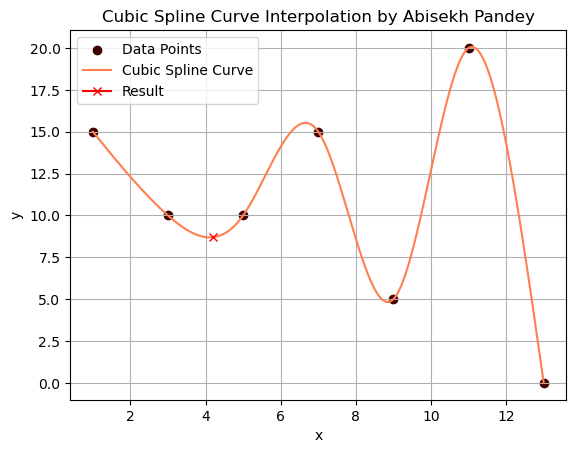

In [31]:
plotSpline(x, y, x_value, y_value)

## Runge Kutta 4 Method 2nd Order

In [20]:
def dydx(x, y, z):
    return z

In [22]:
def dzdx(x, y,z):
    return np.exp(x) + np.sin(x) - 5*z - 6*y

In [24]:
def rungeKutta4(x0, y0, z0, n, xf):
    h = (xf - x0) / n
    x_vals = [x0]
    y_vals = [y0]
    z_vals = [z0]
    x = x0
    y = y0
    z = z0
    for i in range(n):
        k1 = h * dydx(x, y, z)
        l1 = h * dzdx(x,y,z)
        k2 = h * dydx(x + h/2, y + k1/2, z + l1/2)
        l2 = h * dzdx(x + h/2, y + k1/2, z + l1/2)
        k3 = h * dydx(x + h/2, y + k2/2, z+ l2/2)
        l3 = h * dzdx(x + h/2, y + k2/2, z+ l2/2)
        k4 = h * dydx(x + h, y + k3, z + l3)
        l4 = h * dzdx(x + h, y + k3, z + l3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        z += (l1 + 2*l2 + 2*l3 + l4)/6
        x += h
        x_vals.append(x)
        y_vals.append(y)
        z_vals.append(z)

    return x_vals, y_vals, z_vals

In [28]:
x0, y0, z0, n, xf = 0, 1, 1, 10, 0.5
x, y, z = rungeKutta4(x0, y0, z0, n, xf)
print(f"When y({x0}) = {y0}, then, y({xf}) = {y[-1]}: RK4")

When y(0) = 1, then, y(0.5) = 0.884120600048552: RK4


In [34]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y(x) using Runge-Kutta 4th Order Method')
plt.grid(True)
plt.legend()
plt.savefig('y_vs_x_plot.png')
plt.close()

# Plot z vs x
plt.figure(figsize=(10, 6))
plt.plot(x, z, label='z(x)', color='orange')
plt.xlabel('x')
plt.ylabel('z')
plt.title('Plot of z(x) using Runge-Kutta 4th Order Method')
plt.grid(True)
plt.legend()
plt.savefig('z_vs_x_plot.png')
plt.close()